# Question 1


Step 1: Import the necessary libraries
Step 2:  Import the dataset
Step 3. Assign it to a variable called users

In [4]:
import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 4. Discover what is the mean age per occupation

In [5]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [10]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [11]:
result_1 = users.groupby('occupation').agg({'age': ['min','max']})
result_1

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

Step 7. For each combination of occupation and sex, calculate the mean age

In [13]:
result_2 = users.groupby(['occupation','gender']).agg({'age': ['mean']})
result_2

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

Step 8. For each occupation present the percentage of women and men

In [15]:
df = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
df

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889


# Question 2

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called users

In [17]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [18]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [19]:
teams_count = euro12['Team'].count()
teams_count

16

Step 6. What is the number of columns in the dataset?


In [20]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

In [21]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [28]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


Step 9. Calculate the mean Yellow Cards given per Team

In [24]:
mean_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


Step 10. Filter teams that scored more than 6 goals

In [29]:
goals_per_team = euro12[['Team','Goals']]
greater_goals = goals_per_team[goals_per_team['Goals']  > 6]
greater_goals

,Team,Goals
5,Germany,10
13,Spain,12


Step 11. Select the teams that start with G

In [30]:
Teams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

Step 12. Select the first 7 columns

In [31]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [32]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [33]:
shooting_accuracy = euro12[['Team','Shooting Accuracy']]
val = shooting_accuracy.loc[shooting_accuracy.Team.isin(['England','Italy','Russia'])]
val

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [35]:
import pandas as pd
import numpy as np
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     3
1     1
2     3
3     1
4     4
     ..
95    2
96    2
97    3
98    3
99    2
Length: 100, dtype: int32 0     2
1     3
2     3
3     3
4     2
     ..
95    3
96    3
97    2
98    2
99    2
Length: 100, dtype: int32 0     21944
1     17940
2     14111
3     20438
4     11649
      ...  
95    11079
96    28337
97    21748
98    15157
99    21286
Length: 100, dtype: int32


Step 3. Create a DataFrame by joinning the Series by column

In [36]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,3,2,21944
1,1,3,17940
2,3,3,14111
3,1,3,20438
4,4,2,11649


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [38]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,21944
1,1,3,17940
2,3,3,14111
3,1,3,20438
4,4,2,11649


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'

In [39]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,3
1,1
2,3
3,1
4,4
...,...
95,11079
96,28337
97,21748
98,15157


Step 6. Ops it seems it is going only until index 99. Is it true?

In [41]:
len(bigcolumn)

300

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [42]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,1
2,3
3,1
4,4
...,...
295,11079
296,28337
297,21748
298,15157


# Question 4
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.


Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt

In [51]:
import pandas as pd
file_path = 'D:\Data Programming\Assignment\wind.txt'
wind_data = pd.read_csv(file_path, delimiter='\s+', skiprows=1)
print(wind_data.head())


   61  1  1.1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  \
0  61  1    2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1  61  1    3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2  61  1    4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
3  61  1    5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
4  61  1    6  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

   12.58  18.50  15.04.1  
0   9.67  17.54    13.83  
1   7.67  12.75    12.71  
2   5.88   5.46    10.88  
3  10.34  12.92    11.83  
4   7.50   8.12    13.17  


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.

In [19]:
# Assign column names
column_names = ["Yr", "Mo", "Dy", "RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]
# Assign it to a variable called 'data'
data = wind_data.copy()
# Add column names
data.columns = column_names
# Combine the first three columns into a single datetime index
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())



              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.

In [20]:
data = wind_data.copy() 
# Add column names
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64.


In [23]:
data = wind_data.copy() 
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
print(data.head())


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
DateTime                                                                   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   
2061-01-06  13.21   8.12   9.96   6.67   5.37  4.50  10.67   4.42   7.17   

              CLO    BEL    MAL  
DateTime                         
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
2061-01-06   7.50   8.12  13.17  


Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below

In [18]:
data.index = pd.to_datetime(data.index)
missing_values = data.isnull().sum()
print("Number of missing values for each location:")
print(missing_values)


Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    1
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


Step 7. Compute how many non-missing values there are in total.

In [29]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000

data['Yr'] = data['Yr'].apply(fix_year)

# Setting  the 'DateTime' column as index
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)

# Counting the total number of non-missing values in the dataset
total_non_missing = data.count().sum()
print("Total number of non-missing values in the dataset:", total_non_missing)


Total number of non-missing values in the dataset: 78846


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times

In [32]:
data = wind_data.copy() 
data.columns = column_names

# Combine the first three columns into a single datetime index
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000

# Apply the fix_year function to the 'Yr' column
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
# Calculating the windspeeds over all locations and times
mean_windspeed = data.mean().mean()
print("Mean windspeed over all locations and times:", mean_windspeed)

Mean windspeed over all locations and times: 10.22759021606677


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days

In [34]:
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)

# Calculating min, max, mean, and standard deviations of windspeeds at each location
loc_stats = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std()
})
print(loc_stats)


      Min    Max       Mean       Std
RPT  0.67  35.80  12.362580  5.618744
VAL  0.21  33.37  10.643658  5.267488
ROS  1.50  33.84  11.660297  5.008796
KIL  0.00  28.46   6.306014  3.605898
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.091832  3.968837
DUB  0.00  30.37   9.796753  4.977704
CLA  0.00  31.08   8.494786  4.499739
MUL  0.00  25.88   8.493234  4.167090
CLO  0.04  28.21   8.706742  4.504044
BEL  0.13  42.38  13.120189  5.835104
MAL  0.67  42.54  15.599164  6.700300


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.

In [39]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)

# Calculating min, max, mean, and standard deviations of windspeeds at each day
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})
print(day_stats)


             Min    Max       Mean       Std
DateTime                                    
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-03  6.17  18.50  11.641818  3.681912
2061-01-04  1.79  11.75   6.619167  3.198126
2061-01-05  6.17  13.33  10.630000  2.445356
2061-01-06  4.42  13.21   8.240000  2.998063
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6573 rows x 4 columns]


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [40]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Function to fix the year
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
# Calculate average windspeed in January for each location
january_avg = data[data.index.month == 1].mean()
print(january_avg)


RPT    14.846978
VAL    12.910881
ROS    13.299856
KIL     7.195745
SHA    11.667734
BIR     8.051580
DUB    11.816032
CLA     9.510719
MUL     9.540898
CLO    10.049031
BEL    14.543429
MAL    18.034129
dtype: float64


Step 12. Downsample the record to a yearly frequency for each location.

In [43]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
yearly_data = data.resample('Y').mean()
print(yearly_data.head())


                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
1972-12-31  12.463962  10.561311  12.058333  5.929699   9.430410  6.358825   
1973-12-31  11.828466  10.680493  10.680493  5.547863   9.640877  6.548740   

                 DUB       CLA       MUL       CLO        BEL        MAL  
DateTime                                                                  
1969-12-31  8.564493  7.711397  7.924521  7.754384  12.621233  15.762904  
1970-12-31  9.609890  8.334630  9.297616  8.289808  13.183644  16.456027  
1971-12-31  8.385890  6.757315  7.915370  7.229753  12.208932  15.025233  
1972-12-31  9.704508  7.680792  8.357295  7.515273  12.727377  15.028716  
197

Step 13. Downsample the record to a monthly frequency for each location.


In [49]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
monthly_data = data.resample('M').mean()
print(monthly_data.head())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-01-31  12.824839  12.113871  11.403871  6.708710  10.557097  5.926452   
1969-02-28  13.504643  10.426786  14.240714  7.326786  11.314643  5.482857   
1969-03-31  10.398710   8.533226  12.277419  6.125161   9.618065  4.942581   
1969-04-30  12.591333   9.769333  10.828000  6.937333  11.304667  5.578000   
1969-05-31   9.419032   7.941935   9.298387  5.137097   8.618710  5.391935   

                  DUB       CLA       MUL       CLO        BEL        MAL  
DateTime                                                                   
1969-01-31   9.882903  8.375161  8.378065  9.515484  13.410000  16.957742  
1969-02-28  10.983929  8.747143  8.994286  9.081071  14.334643  19.786786  
1969-03-31   9.193226  8.503226  8.376129  7.800968  10.394194  16.420000  
1969-04-30   9.383333  8.141667  9.201333  8.370333  11.905667  14.124000

Step 14. Downsample the record to a weekly frequency for each location.


In [50]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
weekly_data = data.resample('W').mean()
print(weekly_data.head())


                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1969-01-05   5.884000   3.958000   6.758000  2.752000   5.416000  2.392000   
1969-01-12  14.708571  12.521429  15.135714  6.851429  11.940000  6.744286   
1969-01-19  15.030000  16.452857  10.778571  7.774286  12.590000  6.821429   
1969-01-26  14.438571  14.267143  13.017143  7.721429  10.607143  7.114286   
1969-02-02  13.510000  11.917143  10.702857  8.111429  11.581429  5.612857   

                  DUB        CLA        MUL        CLO        BEL        MAL  
DateTime                                                                      
1969-01-05   8.626000   4.388000   5.640000   7.160000  11.510000  16.108000  
1969-01-12  10.591429   9.174286   9.107143  10.124286  12.130000  20.385714  
1969-01-19   9.998571   8.815714   9.078571   8.385714  13.624286  14.248571  
1969-01-26   8.537143  10.030000   7.720000  10.720000  15

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [55]:
data = wind_data.copy()
data.columns = column_names
date_columns = ["Yr", "Mo", "Dy"]
data["DateTime"] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
def fix_year(year):
    if year >= 70:
        return year + 1900
    else:
        return year + 2000
data['Yr'] = data['Yr'].apply(fix_year)
data = data.set_index('DateTime')
data = data.drop(columns=date_columns)
data.index = pd.to_datetime(data.index)
data = data.sort_index()
weekly_data = data.loc['1961-01-02':].resample('W-Mon').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_data.head())


             RPT                                VAL                    \
             min    max       mean       std    min    max       mean   
DateTime                                                                
1969-01-06  2.62  14.25   7.278333  4.319673   0.54  11.12   5.151667   
1969-01-13  4.50  22.34  13.315714  6.710583   1.50  18.50  11.147143   
1969-01-20  9.59  25.08  16.975714  5.149232  13.29  25.17  18.554286   
1969-01-27  4.00  20.54  14.462857  6.008355   5.13  20.25  13.892857   
1969-02-03  5.21  18.58  12.457143  4.694119   3.96  19.79  11.380000   

                       ROS         ...        CLO              BEL         \
                 std   min    max  ...       mean       std    min    max   
DateTime                           ...                                      
1969-01-06  4.252131  5.41  19.50  ...   7.453333  2.224650   6.08  16.08   
1969-01-13  7.108260  4.63  20.91  ...   9.457143  4.016195   2.62  18.84   
1969-01-20  4.536860  5.58  19

# Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo

In [56]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 4. See the first 10 entries

In [58]:
chipotle_data = pd.read_csv(url, delimiter='\t')
print(chipotle_data.head(10))


  Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
0  61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 1...                              
1  61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 1...                              
2  61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 1...                              
3  61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  ...                              
4  61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 1...                              
5  61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 1...                              
6  61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  ...                              
7  61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 1...                              
8  61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  ...                              
9  61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 1...                              


Step 5. What is the number of observations in the dataset?


In [59]:
len(chipo.columns)

5

Step 6. What is the number of columns in the dataset?


In [62]:
chipotle_data = pd.read_csv(url, delimiter='\t')
num_columns = chipotle_data.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")


The number of columns in the dataset is: 5


Step 7. Print the name of all the columns.

In [63]:
chipotle_data = pd.read_csv(url, delimiter='\t')
column_names = chipotle_data.columns
print("Column names:")
for column in column_names:
    print(column)


Column names:
order_id
quantity
item_name
choice_description
item_price


Step 8. How is the dataset indexed?

In [64]:
chipotle_data = pd.read_csv(url, delimiter='\t')
index_info = chipotle_data.index
print("Index information:")
print(index_info)

Index information:
RangeIndex(start=0, stop=4622, step=1)


Step 9. Which was the most-ordered item?

In [65]:
chipotle_data = pd.read_csv(url, delimiter='\t')
item_quantity = chipotle_data.groupby('item_name')['quantity'].sum()
most_ordered_item = item_quantity.idxmax()
print(f"The most-ordered item is: {most_ordered_item}")

The most-ordered item is: Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?


In [66]:
chipotle_data = pd.read_csv(url, delimiter='\t')
item_quantity = chipotle_data.groupby('item_name')['quantity'].sum()
most_ordered_item = item_quantity.idxmax()
quantity_ordered = item_quantity.loc[most_ordered_item]
print(f"The most-ordered item is: {most_ordered_item}")
print(f"Number of items ordered: {quantity_ordered}")

The most-ordered item is: Chicken Bowl
Number of items ordered: 761


Step 11. What was the most ordered item in the choice_description column?


In [67]:
chipotle_data = pd.read_csv(url, delimiter='\t')
chipotle_data_cleaned = chipotle_data.dropna(subset=['choice_description'])
choice_description_quantity = chipotle_data_cleaned.groupby('choice_description')['quantity'].sum()
most_ordered_choice = choice_description_quantity.idxmax()
quantity_ordered_choice = choice_description_quantity.loc[most_ordered_choice]
print(f"The most-ordered item in choice_description is: {most_ordered_choice}")
print(f"Number of items ordered: {quantity_ordered_choice}")

The most-ordered item in choice_description is: [Diet Coke]
Number of items ordered: 159


Step 12. How many items were orderd in total?

In [68]:
chipotle_data = pd.read_csv(url, delimiter='\t')
total_items_ordered = chipotle_data['quantity'].sum()
print(f"The total number of items ordered is: {total_items_ordered}")

The total number of items ordered is: 4972


Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [72]:
chipotle_data = pd.read_csv(url, delimiter='\t')
chipotle_data['item_price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
print(f"Item price type before conversion: {chipotle_data['item_price'].dtype}")
convert_to_float = lambda x: float(x[1:]) if isinstance(x, str) else x
chipotle_data['item_price'] = chipotle_data['item_price'].apply(convert_to_float)
print(f"Item price type after conversion: {chipotle_data['item_price'].dtype}")

Item price type before conversion: float64
Item price type after conversion: float64


Step 14. How much was the revenue for the period in the dataset?

In [76]:
chipotle_data = pd.read_csv(url, delimiter='\t')
chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$,]', '', regex=True).astype(float)
chipotle_data['revenue'] = chipotle_data['quantity'] * chipotle_data['item_price']
total_revenue = chipotle_data['revenue'].sum()
print(f"Total revenue for the period: ${total_revenue:.2f}")


Total revenue for the period: $39237.02


Step 15. How many orders were made in the period?


In [78]:
chipotle_data = pd.read_csv(url, delimiter='\t')
total_orders = chipotle_data['order_id'].nunique()
print(f"Total number of orders in the period: {total_orders}")


Total number of orders in the period: 1834


Step 16. What is the average revenue amount per order?


In [79]:
chipotle_data = pd.read_csv(url, delimiter='\t')
chipotle_data['item_price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:]))
chipotle_data['revenue'] = chipotle_data['quantity'] * chipotle_data['item_price']
average_revenue_per_order = chipotle_data.groupby('order_id')['revenue'].sum().mean()
print(f"Average revenue amount per order: ${average_revenue_per_order:.2f}")


Average revenue amount per order: $21.39


Step 17. How many different items are sold?

In [80]:
chipotle_data = pd.read_csv(url, delimiter='\t')
num_different_items = chipotle_data['item_name'].nunique()
print(f"Number of different items sold: {num_different_items}")


Number of different items sold: 50


# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!

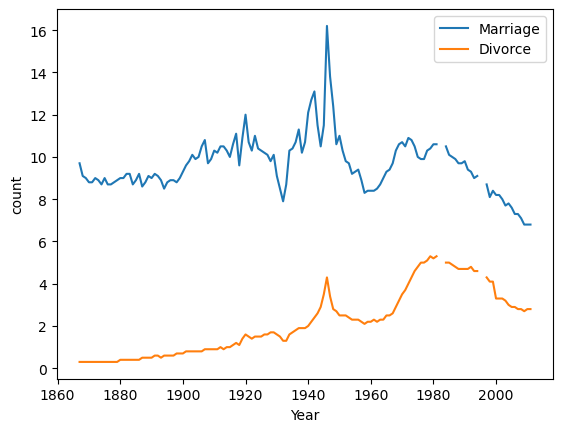

In [86]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
us_mar_div = pd.read_csv("D:\\Data Programming\\Assignment\\us-marriages-divorces-1867-2014.csv")
us_mar_div.sort_values('Year')
year = us_mar_div['Year'].tolist()
mar = us_mar_div['Marriages_per_1000'].tolist()
div = us_mar_div['Divorces_per_1000'].tolist()

df = pd.DataFrame({
   'Marriage': mar,
   'Divorce': div
   }, index=year)

lines = df.plot.line(xlabel='Year', ylabel='count')

# Question 7


Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

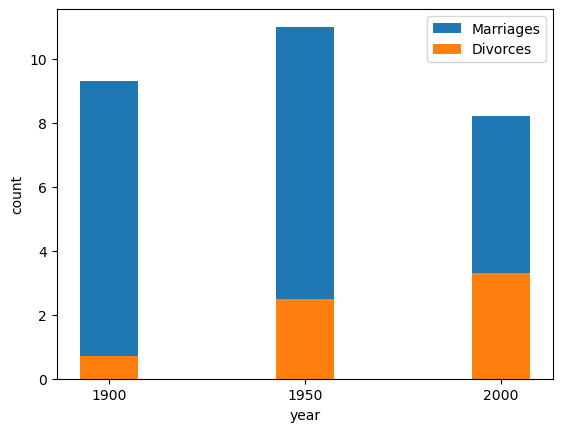

In [88]:
df_selected = us_mar_div[['Year','Marriages_per_1000','Divorces_per_1000']]
val = df_selected.loc[df_selected.Year.isin([1900,1950,2000])]
val
Year = val['Year'].tolist()
Year_str = []
for x in Year:
    Year_str.append(str(x))

Marriages = val['Marriages_per_1000'].tolist()
Divorces = val['Divorces_per_1000'].tolist()

plt.bar(Year_str,Marriages,0.3,label="Marriages")
plt.bar(Year_str,Divorces,0.3,label="Divorces")
       
plt.xlabel("year")
plt.ylabel("count")
plt.legend()
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

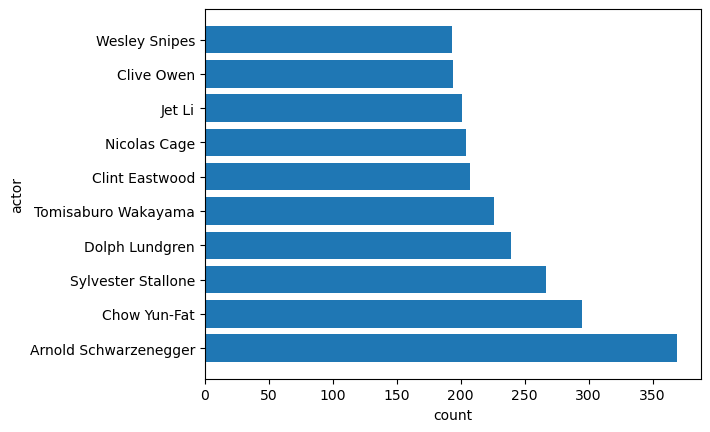

In [91]:
kill_counts = pd.read_csv("D:\\Data Programming\\Assignment\\actor_kill_counts.csv")
kill_counts_sorted = kill_counts.sort_values('Count',ascending = False)
kill_counts_sorted
plt.barh(kill_counts_sorted['Actor'],kill_counts_sorted['Count'])
plt.xlabel('count')
plt.ylabel('actor')
plt.show()

# Question 9


Create a pie chart showing the fraction of all Roman Emperors that were assassinated.Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

<Axes: ylabel='count'>

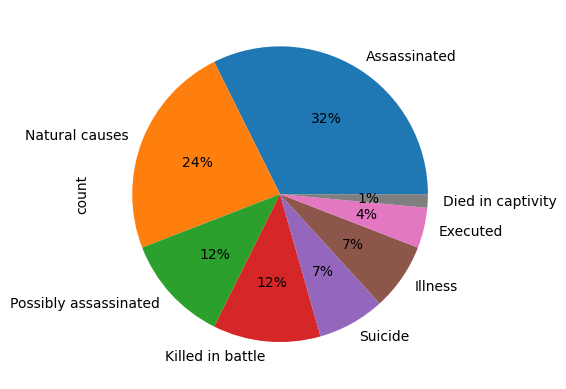

In [92]:
roman_regime = pd.read_csv("D:\\Data Programming\\Assignment\\roman-emperor-reigns.csv")
roman_regime.head()
cause_of_death = roman_regime['Cause_of_Death'].value_counts()
cause_of_death
cause_of_death.plot(kind='pie',autopct='%1.0f%%')

# Question 10


Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009. Don't forget to label your axes!Color each dot according to its year

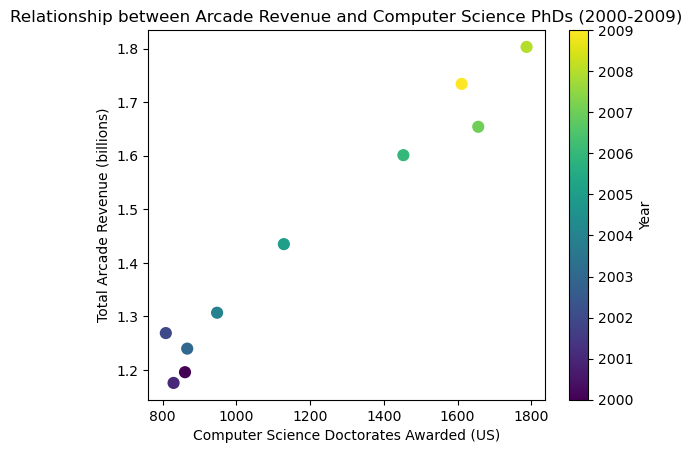

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
arcade_revenue = pd.read_csv("D:\\Data Programming\\Assignment\\arcade-revenue-vs-cs-doctorates.csv")
fig, ax = plt.subplots()
scatter = ax.scatter(
    x='Computer Science Doctorates Awarded (US)',
    y='Total Arcade Revenue (billions)',
    s=60,
    c='Year',
    cmap='viridis',
    data=arcade_revenue
)
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.show()
